<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/textbook_practice/11_training_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그레디언트 소실과 폭주 문제

1. 가중치 초기화 방법에 문제 <br>
- 평균이 0이고 표준편차가 1인 정규분포로부터 초기 가중치를 구했는데 이를 로지스틱 활성화 함수와 같이 사용할 경우, 출력의 분산이 입력의 분산보다 커져서, 가장 높은 층(마지막 층)에서 활성화 함수가 0이나 1로 수렴
- 로지스틱 함수의 평균이 0.5이다. 반면 tanh함수는 평균이 0이므로, 가중치 초기화를 정규분포로 사용했을 때 로지스틱 함수보다 조금 더 나은 성능을 보임
2. 활성화 함수 선택의 문제 <br>
- 활성화 함수로 로지스틱함수를 사용할 경우, 양 극값에서 미분계수가 0으로 수렴함에 따라 가중치 업데이트가 불가능하게 됨

In [1]:
def logit(z):
    return 1 / (1 + np.exp(-z))

(-5.0, 5.0, -0.2, 1.2)

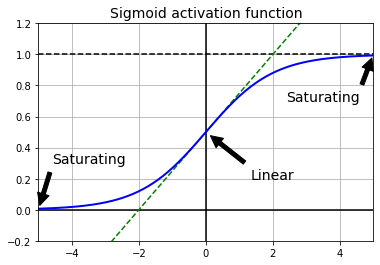

In [3]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

### 글로럿(Xavier)초기화와 He 초기화

저자들은 적절한 신호가 흐르기위해 각 층의 입,출력 분산이 동일해야 한다고 본단다.

|초기화 전략|활성화 함수| $\sigma^2$(정규분포) |
|---|---|---|
|글로럿|활성화 함수 없음(tanh, logistic, softmax)|$\frac{1}{fan_{avg}}$|
|He|ReLU함수와 그 변종들|$\frac{2}{fan_{in}}$|
|르쿤|SELU|$\frac{1}{fan_{in}}$|

- fan-in과 fan-out은 입력과 출력의 연결 개수
- fan-avg = (fan-in + fan-out)/2

In [6]:
import keras
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [7]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [8]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)